<a href="https://colab.research.google.com/github/iesous-kurios/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module1-join-and-reshape-data/GJW_LS_DS_121_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)
- [Hadley Wickham's famous paper](http://vita.had.co.nz/papers/tidy-data.html) on Tidy Data

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [2]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-09-22 22:57:49--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.8.206
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.8.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  57.2MB/s    in 3.6s    

2019-09-22 22:57:53 (54.7 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [3]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [4]:
%cd /content/

/content


In [6]:
!ls -lh *.csv

ls: cannot access '*.csv': No such file or directory


In [7]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [8]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
df_aisles = pd.read_csv('aisles.csv')
df_departments = pd.read_csv('departments.csv')
df_order_products_prior = pd.read_csv('order_products__prior.csv')
df_order_products_train = pd.read_csv('order_products__train.csv')
df_orders = pd.read_csv('orders.csv')
df_products = pd.read_csv('products.csv')

In [0]:
# need: 
# df_orders:
# order_id

# df_products:
# product_name and product_id

# concat: df_order_products train and prior:
# product_id and order_id

In [11]:
order_products = pd.concat([df_order_products_prior, df_order_products_train])
order_products.shape

(33819106, 4)

In [13]:
df_orders.shape

(3421083, 7)

In [0]:
merged = pd.merge(order_products, df_products)

In [15]:
merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [0]:
three_merged = pd.merge(merged, order_products)

In [17]:
three_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [0]:
top_list = three_merged['product_name'].value_counts()

In [19]:
top_list.head(10)

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
import urllib.request

url = 'https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz'
file_name = 'instacart_online_grocery_shopping_2017_05_01.tar.gz'

urllib.request.urlretrieve(url, file_name)

('instacart_online_grocery_shopping_2017_05_01.tar.gz',
 <http.client.HTTPMessage at 0x7efefbab6198>)

In [0]:
import tarfile

tar = tarfile.open(file_name, "r:gz")
tar.extractall()
tar.close()

In [0]:
import os

In [0]:
print(os.getcwd())

/content


In [0]:
os.chdir('/content/instacart_2017_05_01/')

In [0]:
print(os.getcwd())

/content/instacart_2017_05_01


In [0]:
import glob

glob.glob("/content/instacart_2017_05_01/*.csv")

['/content/instacart_2017_05_01/products.csv',
 '/content/instacart_2017_05_01/orders.csv',
 '/content/instacart_2017_05_01/order_products__train.csv',
 '/content/instacart_2017_05_01/order_products__prior.csv',
 '/content/instacart_2017_05_01/aisles.csv',
 '/content/instacart_2017_05_01/departments.csv']

# Join Datasets

## Goal: Reproduce this example

The first two orders for user id 1:

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

In [0]:
import pandas as pd

### aisles

In [0]:
aisles = pd.read_csv("aisles.csv")
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
aisles.shape

(134, 2)

In [0]:
display(example)

In [0]:
aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [0]:
aisles.describe(exclude='number')

,aisle
count,134
unique,134
top,frozen juice
freq,1


### departments

In [0]:
departments = pd.read_csv('departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
departments.shape

(21, 2)

In [0]:
display(example)

### order_products__prior

In [0]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
order_products__prior.shape

(32434489, 4)

We need:
- order_id
- product_id
- add_to_cart_order

### order_products__train

In [0]:
order_products__train = pd.read_csv('order_products__train.csv')
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
order_products__train.shape

(1384617, 4)

### orders

In [0]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
display(example)

### We need:
- order_id
- user_id
- order_number
- order_dow
- order_hour_of_day

### products

In [0]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
products.shape

(49688, 4)

## Concatenate order_products__prior and order_products__train

In [0]:
order_products = pd.concat([order_products__prior, order_products__train])
order_products.shape

(33819106, 4)

In [0]:
print(order_products__prior.shape, order_products__train.shape, order_products.shape)

(32434489, 4) (1384617, 4) (33819106, 4)


In [0]:
assert len(order_products__prior) + len(order_products__train) == len(order_products)

In [0]:
display(example)

# Short `groupby` example

In [0]:
order_products.groupby('order_id')['product_id'].count().mean()

10.10707325550502

In [0]:
grouped_orders = order_products.groupby('order_id')

In [0]:
grouped_orders.get_group(2539329)

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [0]:
order_products[order_products['order_id'] == 2539329]

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [0]:
grouped_orders['product_id'].count()

order_id
1           8
2           9
3           8
4          13
5          26
6           3
7           2
8           1
9          15
10         15
11          5
12         15
13         13
14         11
15          5
16          3
18         28
19          3
20          8
21          5
22         14
23         14
24          3
25         14
26          8
27         27
28         16
29          5
30          3
31         10
           ..
3421053     9
3421055    19
3421056     5
3421057     5
3421058     8
3421059     6
3421060    17
3421061    22
3421062     7
3421063     4
3421064     3
3421065     5
3421066     6
3421067     1
3421068    14
3421069    12
3421070     3
3421071     5
3421072    12
3421073     2
3421074     4
3421075     8
3421076     8
3421077     4
3421078     9
3421079     1
3421080     9
3421081     7
3421082     7
3421083    10
Name: product_id, Length: 3346083, dtype: int64

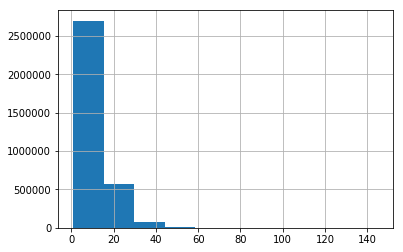

In [0]:
grouped_orders['product_id'].count().hist()

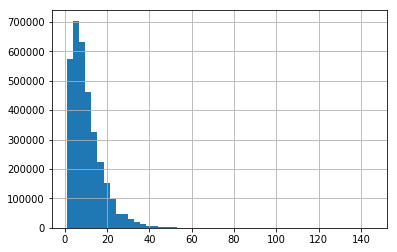

In [0]:
grouped_orders['product_id'].count().hist(bins=50)

## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [0]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
orders.shape

(3421083, 7)

In [0]:
condition = (orders['user_id'] == 1) & (orders['order_number'] <= 2)
columns = ['order_id','user_id', 'order_number', 'order_dow', 'order_hour_of_day']
subset = orders[condition][columns]

In [0]:
subset.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day
0,2539329,1,1,2,8
1,2398795,1,2,3,7


## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [0]:
columns = ['order_id','product_id','add_to_cart_order']
merged = pd.merge(subset, order_products[columns])
merged.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order
0,2539329,1,1,2,8,196,1
1,2539329,1,1,2,8,14084,2
2,2539329,1,1,2,8,12427,3
3,2539329,1,1,2,8,26088,4
4,2539329,1,1,2,8,26405,5


In [0]:
display(example)

Merge with columns from `products`

In [0]:
final = pd.merge(merged, products[['product_id', 'product_name']])
final.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,product_name
0,2539329,1,1,2,8,196,1,Soda
1,2398795,1,2,3,7,196,1,Soda
2,2539329,1,1,2,8,14084,2,Organic Unsweetened Vanilla Almond Milk
3,2539329,1,1,2,8,12427,3,Original Beef Jerky
4,2398795,1,2,3,7,12427,3,Original Beef Jerky


In [0]:
columns = ['user_id', 'order_id', 'order_number','order_dow','order_hour_of_day','add_to_cart_order', 'product_id','product_name']
final = final[columns]

In [0]:
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [0]:
final = final.sort_values(by=['order_number', 'add_to_cart_order'])
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [0]:
columns = [col.replace('_', ' ') for col in final.columns]
columns

['user id',
 'order id',
 'order number',
 'order dow',
 'order hour of day',
 'add to cart order',
 'product id',
 'product name']

In [0]:
final.columns = columns

In [0]:
final

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [0]:
display(example)

# Reshape Datasets

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [0]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [0]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [0]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [0]:
table1.index

Index(['John Smith', 'Jane Doe', 'Mary Johnson'], dtype='object')

In [0]:
table1 = table1.reset_index()

In [0]:
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [0]:
tidy = table1.melt(id_vars='index')
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
tidy.columns = ['name', 'trt', 'result']
tidy

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


## Table 2 --> Tidy

In [0]:
##### LEAVE BLANK --an assignment exercise #####

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [0]:
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [0]:
tidy.pivot_table(index='name', columns='trt', values='result')

trt,treatmenta,treatmentb
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [0]:
##### LEAVE BLANK --an assignment exercise #####

# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

In [0]:
import seaborn as sns

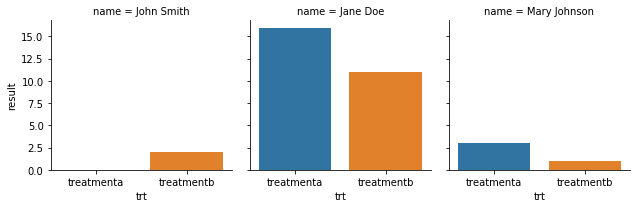

In [0]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=3);

## Now with Instacart data

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

In [0]:
product_names = ['Half And Half Ultra Pasteurized', 'Half Baked Frozen Yogurt']

In [0]:
products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [0]:
orders.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [0]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [0]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))

In [0]:
merged.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [0]:
condition = merged['product_name'].isin(product_names)
subset = merged[condition]
subset.head()

,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


In [0]:
assert sorted(list(subset['product_name'].unique())) == sorted(product_names)

## 4 ways to reshape and plot

### 1. value_counts

In [0]:
froyo = subset[subset['product_name'] == 'Half Baked Frozen Yogurt']
cream = subset[subset['product_name'] == 'Half And Half Ultra Pasteurized']

In [0]:
cream.head()

,product_id,product_name,order_id,order_hour_of_day
45167,9292,Half And Half Ultra Pasteurized,802884,8
74055,9292,Half And Half Ultra Pasteurized,3230936,14
163486,9292,Half And Half Ultra Pasteurized,1599440,11
191375,9292,Half And Half Ultra Pasteurized,212295,8
200888,9292,Half And Half Ultra Pasteurized,507671,14


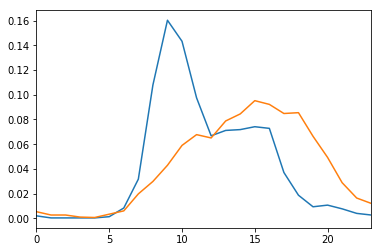

In [0]:
cream['order_hour_of_day'].value_counts(normalize=True).sort_index().plot()
froyo['order_hour_of_day'].value_counts(normalize=True).sort_index().plot();

### 2. crosstab

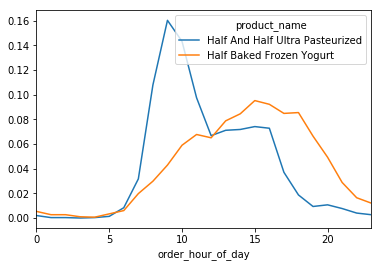

In [0]:
pd.crosstab(subset['order_hour_of_day'], subset['product_name'], normalize='columns').plot()

### 3. Pivot Table

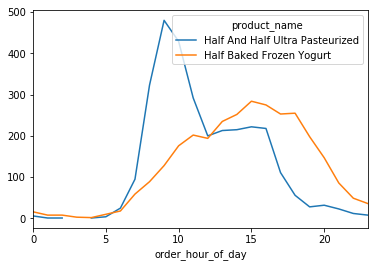

In [0]:
subset.pivot_table(index='order_hour_of_day', columns='product_name', values='order_id', aggfunc=len).plot()

### 4. melt

In [0]:
table = pd.crosstab(subset['order_hour_of_day'], 
                    subset['product_name'], 
                    normalize=True)
table.head()

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,0.001004,0.002676
1,0.000167,0.001338
2,0.000167,0.001338
3,0.000000,0.000502
4,0.000167,0.000335


In [0]:
melted = (table
 .reset_index()
 .melt(id_vars='order_hour_of_day')
 .rename(columns={
     'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 }))
melted

,Hour of Day Ordered,Product,Percent of Orders by Product
0,0,Half And Half Ultra Pasteurized,0.001004
1,1,Half And Half Ultra Pasteurized,0.000167
2,2,Half And Half Ultra Pasteurized,0.000167
3,3,Half And Half Ultra Pasteurized,0.000000
4,4,Half And Half Ultra Pasteurized,0.000167
5,5,Half And Half Ultra Pasteurized,0.000669
6,6,Half And Half Ultra Pasteurized,0.004182
7,7,Half And Half Ultra Pasteurized,0.015892
8,8,Half And Half Ultra Pasteurized,0.054031
9,9,Half And Half Ultra Pasteurized,0.080294


In [0]:
import seaborn as sns

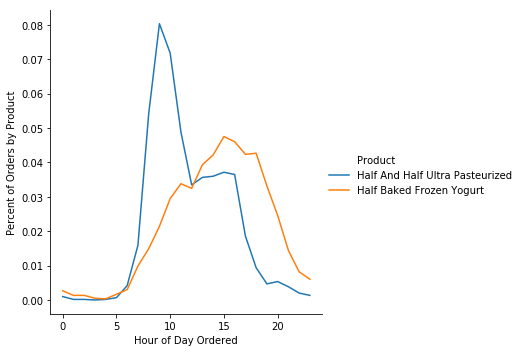

In [0]:
sns.relplot(x='Hour of Day Ordered', 
            y='Percent of Orders by Product', 
            hue='Product', 
            data=melted, 
            kind='line');